In [1]:
import numpy as np
import math as mth
import matplotlib.pyplot as plt

A matrix can act as a derivative operator over a variable of finite differences
to give an example where x is a vector made up of discrete values over a range and y is sin of x
D*y = y' and D is a matrix. In the easiest case we will just take an approximate derivative by calculating
the linear slope between each point and returning a vector

In [2]:
N = 25
x = np.linspace(-np.pi,np.pi,N)#N points between -pi and pi
dx = x[1]-x[0]
y = np.sin(x)
y

array([-1.22464680e-16, -2.58819045e-01, -5.00000000e-01, -7.07106781e-01,
       -8.66025404e-01, -9.65925826e-01, -1.00000000e+00, -9.65925826e-01,
       -8.66025404e-01, -7.07106781e-01, -5.00000000e-01, -2.58819045e-01,
        0.00000000e+00,  2.58819045e-01,  5.00000000e-01,  7.07106781e-01,
        8.66025404e-01,  9.65925826e-01,  1.00000000e+00,  9.65925826e-01,
        8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
        1.22464680e-16])

In [3]:
D = np.diag(np.ones(N-1),k=1) -np.identity(N)
D[-1][-1] = 1 #we have to fix the last row because we have been taking the slope between x_n, and x_n+1
D[-1][-2] = -1#now the last row does x_n and x_n-1
D = D/dx
D

array([[-3.81971863,  3.81971863,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -3.81971863,  3.81971863,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -3.81971863,  3.81971863,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

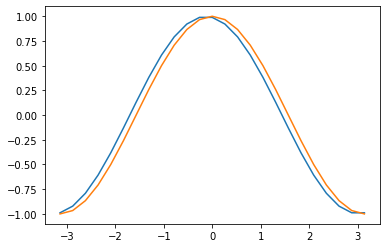

In [4]:
y_prime_approx = np.matmul(D,y)
y_prime = np.cos(x)
plt.plot(x,y_prime_approx,x,y_prime)
plt.show()

The next level of improvement would be if we calculated the slope at x_n-1 ->x_n, and averaged it
with the slope at x_n+1 -> x_n. We won't be able to do this at the end points though

In [5]:
D = np.zeros((N,N))-np.diag(np.ones(N-1),k=-1) + np.diag(np.ones(N-1),k=1)
"""The end rows have 2 because this is only one dx apart and the rest of the points 
are 2 apart and we will be dividing the whole thing by 2dx"""
D[-1][-1] = 2
D[-1][-2] = -2
D[0][0] = -2
D[0][1] = 2
D /= 2*dx
D

array([[-3.81971863,  3.81971863,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-1.90985932,  0.        ,  1.90985932,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -1.90985932,  0.        ,  1.90985932,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0

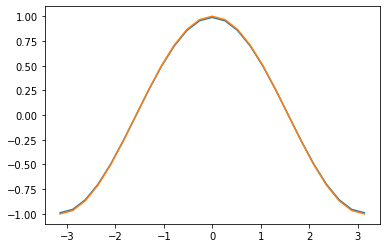

In [6]:
y_prime_approx = np.matmul(D,y)
y_prime = np.cos(x)
plt.plot(x,y_prime_approx,x,y_prime)
plt.show()

We can use the taylor series approx. to improve accuracy and generate the matrix D.<br>
A*f(x-dx)~ A*(f(x) - f'(x)*dx + f''(x)*dx^2/2 ....)<br>
B*f(x) = B*f(x)<br>
C*f(x+dx) ~ C*(f(x) + f'(x)*dx + f''(x)*dx^2/2 .....)<br>
f''(x) ~ (A+B+C)*fx + (C-A)f'(x) + (A+C)f''(x)<br>
A+B+C = 0<br>
C-A = 0<br>
A+C = 1 <br>
We can easily solve this system of equations to find our approximation of<br> 
f''(x) using the points x-dx,x, and x +dx<br>
but as you will see when we construct the end rows we could have used any points such as<br>
x,x+dx,d+2dx... and we could have solved for any order of derivative we chose

In [7]:
def find_operator(pnts,n_diff,dx):
    d = []
    for row in range(len(pnts)):
        tmp = [val**row/mth.factorial(row) for val in pnts]
        d.append(tmp[::])
    D = np.linalg.inv(np.array(d))
    x = np.zeros(len(pnts))
    x[n_diff] = 1
    return np.matmul(D,x)/dx**n_diff

In [8]:
row =find_operator([-1,0,1],2,dx)#this will produce a row of our 2nd derivative operator using  points -dx,x,dx
row

array([ 14.59025044, -29.18050089,  14.59025044])

In [9]:
row1 = find_operator([0,1,2,3],2,dx) #I am using a higher order approximation for these rows to reduce error
row_last = find_operator([-3,-2,1,0],2,dx)

In [14]:
D = np.zeros((N,N)) + np.identity(N)*row[1] + np.diag(np.ones(N-1)*row[0],k=-1) + np.diag(np.ones(N-1)*row[2],k=1)
D[0][0:4] = row1
D[-1][-4:] = row_last


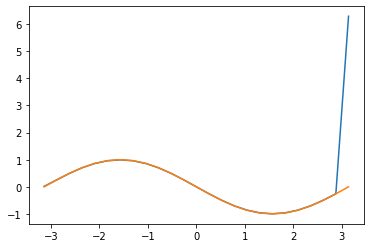

In [15]:
y_prime_approx = np.matmul(D,y)
y_prime = -np.sin(x) # this changed because we are doing 2nd derivative now
plt.plot(x,y_prime_approx,x,y_prime)
plt.show()

the end point is still problematic, I may investigate/fix this at another time, but for now I leave it up to you.